In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import pyrtools as pt

im = np.random.normal(0,1,[240,240])

pyr = pt.pyramids.SteerablePyramidFreq(im, \
                       is_complex=True, height = 4, order = 4-1)



In [3]:
for kk in pyr.pyr_coeffs.keys():
    print(kk)
    print(pyr.pyr_coeffs[kk].shape)

residual_highpass
(240, 240)
(0, 0)
(240, 240)
(0, 1)
(240, 240)
(0, 2)
(240, 240)
(0, 3)
(240, 240)
(1, 0)
(120, 120)
(1, 1)
(120, 120)
(1, 2)
(120, 120)
(1, 3)
(120, 120)
(2, 0)
(60, 60)
(2, 1)
(60, 60)
(2, 2)
(60, 60)
(2, 3)
(60, 60)
(3, 0)
(30, 30)
(3, 1)
(30, 30)
(3, 2)
(30, 30)
(3, 3)
(30, 30)
residual_lowpass
(15, 15)


In [5]:
# computing cutoff freqs of the bands in the pyramid
fmax = 0.5
lowpass_cutoffs = np.zeros((4,))
highpass_cutoffs = np.zeros((4,))
for ii in range(4):
    highpass_cutoffs[ii] = fmax # this is nyquist freq for the image    
    lowpass_cutoff = fmax/4
    lowpass_cutoffs[ii] = lowpass_cutoff
    
    # then image gets downsampled
    fmax = fmax/2 
    
    
centers = highpass_cutoffs[1:]
arr = np.array([lowpass_cutoffs, highpass_cutoffs])
centers = 2**np.mean(np.log(arr)/np.log(2), axis=0)
print(lowpass_cutoffs, highpass_cutoffs, centers)

[0.125    0.0625   0.03125  0.015625] [0.5    0.25   0.125  0.0625] [0.25    0.125   0.0625  0.03125]


In [6]:
centers = highpass_cutoffs[1:]
arr = np.array([lowpass_cutoffs, highpass_cutoffs])
centers = 2**np.mean(np.log(arr)/np.log(2), axis=0)
centers

array([0.25   , 0.125  , 0.0625 , 0.03125])

In [7]:
# now convert to cycles/degree
deg_per_image = 8.4
n_pix = 240
lowpass_cutoffs_cpd = lowpass_cutoffs * n_pix/deg_per_image
highpass_cutoffs_cpd = highpass_cutoffs * n_pix/deg_per_image

arr = np.array([lowpass_cutoffs_cpd, highpass_cutoffs_cpd])

centers_cpd = highpass_cutoffs_cpd[1:]
centers_cpd = 2**np.mean(np.log(arr)/np.log(2), axis=0)
centers_cpd

array([7.14285714, 3.57142857, 1.78571429, 0.89285714])

In [15]:
import pandas as pd
pyr_df = pd.DataFrame(data=np.array([lowpass_cutoffs, highpass_cutoffs, centers, \
                            lowpass_cutoffs_cpd, highpass_cutoffs_cpd, centers_cpd]).T, \
                             columns=['lowpass cutoff (cyc/pix)', \
                             'highpass cutoff (cyc/pix)', \
                             'approx center (cyc/pix)', \
                             'lowpass cutoff (cyc/deg)', \
                             'highpass cutoff (cyc/deg)', \
                             'approx center (cyc/deg)'])

from utils import default_paths
fn2save = os.path.join(default_paths.pyramid_texture_feat_path,'pyr_pars.csv')
pyr_df.to_csv(fn2save)

/home/mmhender/myenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mmhender/myenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mmhender/myenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mmhender/myenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mmhender/myenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mmhender/myenv/lib/python3.7/site-packages/matplo

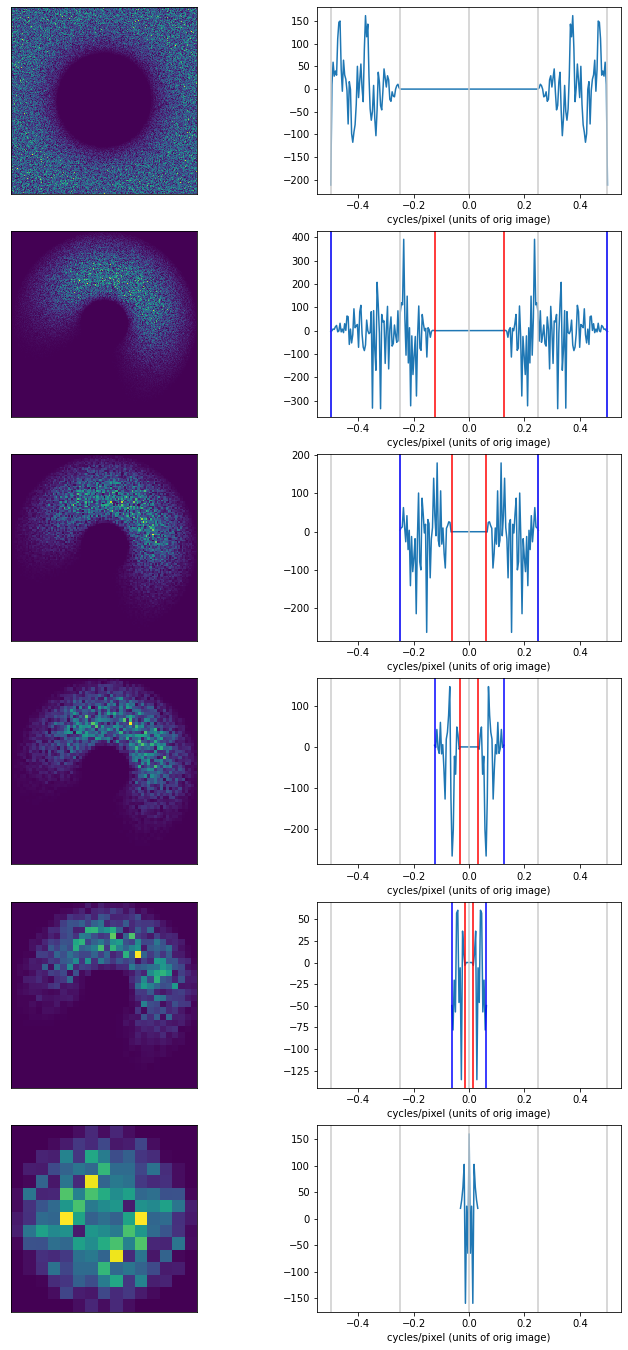

In [36]:
from scipy import fft, ifft

plt.figure(figsize=(12,24));

pi=0;
ds_by = [1,2,4,8,16]
orig_pix = 240;

rep = pyr.pyr_coeffs['residual_highpass']

pi=pi+1;
plt.subplot(6,2,pi)
rep_fft = fft.fftshift(fft.fft2(rep))
plt.pcolormesh(np.abs(rep_fft))
plt.axis('square')
plt.xticks([])
plt.yticks([])

pi=pi+1;
plt.subplot(6,2,pi)
center_pix=np.floor(rep.shape[0]/2).astype(int)
fax = np.linspace(-0.5, 0.5, rep.shape[0])/ds_by[0]
cross_sect = rep_fft[center_pix,:]
cross_sect2 = rep_fft[:,center_pix]
cross_sect = np.mean(np.array([cross_sect, cross_sect2, \
                               np.flip(cross_sect), np.flip(cross_sect2)]), axis=0)
plt.plot(fax, cross_sect)
plt.xlabel('cycles/pixel (units of orig image)')
for ll in [-0.5, -0.25, 0, 0.25, 0.5]:
    plt.axvline(ll, color=[0.8, 0.8, 0.8])

for ii in range(4):
    

    rep = pyr.pyr_coeffs[(ii,0)]+pyr.pyr_coeffs[(ii,1)]+pyr.pyr_coeffs[(ii,2)]+pyr.pyr_coeffs[(ii,3)]
    assert(rep.shape[0]==orig_pix/ds_by[ii])
 
    pi=pi+1;
    plt.subplot(6,2,pi)
    rep_fft = fft.fftshift(fft.fft2(rep))
    plt.pcolormesh(np.abs(rep_fft))
    plt.axis('square')
    plt.xticks([])
    plt.yticks([])

    pi=pi+1;
    plt.subplot(6,2,pi)
    center_pix=np.floor(rep.shape[0]/2).astype(int)
    fax = np.linspace(-0.5, 0.5, rep.shape[0])/ds_by[ii]
    cross_sect = rep_fft[center_pix,:]
    cross_sect2 = rep_fft[:,center_pix]
    cross_sect = np.mean(np.array([cross_sect, cross_sect2, \
                                   np.flip(cross_sect), np.flip(cross_sect2)]), axis=0)
    plt.plot(fax, cross_sect)
    plt.xlabel('cycles/pixel (units of orig image)')
    for ll in [-0.5, -0.25, 0, 0.25, 0.5]:
        plt.axvline(ll, color=[0.8, 0.8, 0.8])

    plt.axvline(lowpass_cutoffs[ii], color='r')
    plt.axvline(-lowpass_cutoffs[ii], color='r')
    plt.axvline(highpass_cutoffs[ii], color='b')
    plt.axvline(-highpass_cutoffs[ii], color='b')
    
rep = pyr.pyr_coeffs['residual_lowpass']
    
pi=pi+1;
plt.subplot(6,2,pi)
rep_fft = fft.fftshift(fft.fft2(rep))
plt.pcolormesh(np.abs(rep_fft))
plt.axis('square')
plt.xticks([])
plt.yticks([])

pi=pi+1;
plt.subplot(6,2,pi)
center_pix=np.floor(rep.shape[0]/2).astype(int)
fax = np.linspace(-0.5, 0.5, rep.shape[0])/ds_by[4]
cross_sect = rep_fft[center_pix,:]
cross_sect2 = rep_fft[:,center_pix]
cross_sect = np.mean(np.array([cross_sect, cross_sect2, \
                               np.flip(cross_sect), np.flip(cross_sect2)]), axis=0)
plt.plot(fax, cross_sect)
plt.xlabel('cycles/pixel (units of orig image)')
for ll in [-0.5, -0.25, 0, 0.25, 0.5]:
    plt.axvline(ll, color=[0.8, 0.8, 0.8])